# Chapter6 画像データの表現

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io # to read as RGB

## 2.1 
> 各画像のRGBの明度値の平均値が128以上の場合には, (R, G, B) = (255, 255, 255), 128未満の場合には(R, G, B) = (0, 0, 0)に書き換えることで, 画像全体を2値画像に変換するコードを作成せよ.

In [37]:
def to_binary(image):
    out_image = image.copy()
    out_image = np.minimum(np.mean(out_image, axis=2, keepdims=True) // 127, 1) * 255
    return out_image.astype(np.uint8)

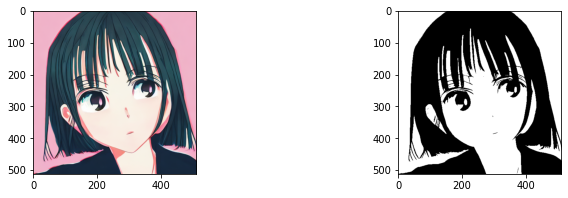

In [56]:
img = io.imread("stable-diffusion_柴田真宏_anime.png")
img_binary = to_binary(img)
(fig, ax) = plt.subplots(1, 2, figsize=(12, 3))
ax[0].imshow(img)
ax[1].imshow(img_binary, cmap="gray")
plt.show()

## 2.2
> 各画素の明度値をRGBの明度地の平均値に置き換えることで, 画像をグレースケール化し, 保存するコードを作成せよ.

In [51]:
def to_gray(image):
    out_image = image.copy()
    out_image = np.mean(out_image, axis = 2)
    return out_image.astype(np.uint8)

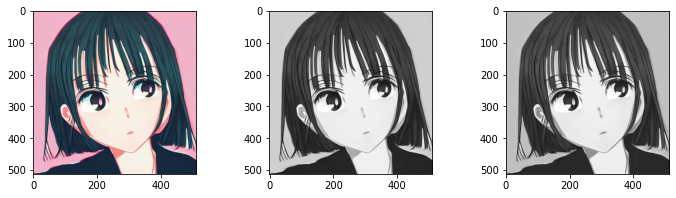

In [70]:
img_gray = to_gray(img)
img_gray_cv2 = img.copy()
img_gray_cv2 = cv2.cvtColor(img_gray_cv2, cv2.COLOR_RBG2GRAY)

(fig, ax) = plt.subplots(1, 3, figsize=(12, 3))
ax[0].imshow(img)
ax[1].imshow(img_gray, cmap="gray")
ax[2].imshow(img_gray_cv2, cmap="gray")
plt.show()

## 2.3
> 画像のR, G, Bの各チャネルについて, 明度値の平均と分散を表示するコードを作成し, 様々な画像を入力して試してみよ.

In [75]:
def rgb_moment(image):
    for i, c in enumerate(["R", "G", "B"]):
        print(f"{c}: mean {np.mean(image[..., i]):.2f}, var {np.var(image[..., i]):.2f}")

In [76]:
rgb_moment(img)

R: mean 139.45, var 10811.26
B: mean 129.90, var 5820.48
G: mean 140.09, var 4967.96


In [77]:
img2 = io.imread("stable-diffusion_柴田真宏_anime_2.png")
rgb_moment(img2)

R: mean 109.56, var 4427.34
B: mean 143.74, var 4376.10
G: mean 160.14, var 3723.37
